In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [4]:
#list(raw_data.columns)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

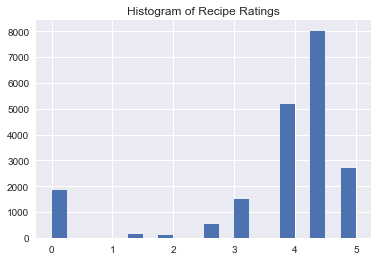

In [7]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [8]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [3]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.5, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.5, replace=True, random_state=1)
svr.fit(X,Y)


__Note that this actually takes quite a while to run, compared to some of the models we've done before. Around 5-7 mins. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

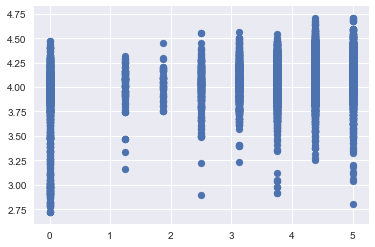

In [10]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [11]:
svr.score(X, Y)

0.018479191048604182

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [11]:
raw_data.shape

(20052, 680)

In [22]:
#raw_data.isnull().sum()

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
raw_data.info()
print("\n -----------------Simple statistics for each variable -----------\n")
raw_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB

 -----------------Simple statistics for each variable -----------



,count,mean,std,min,25%,50%,75%,max
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0
calories,15935.0,6322.958017,359046.041242,0.0,198.00,331.000,586.000,30111218.0
protein,15890.0,100.160793,3840.318527,0.0,3.00,8.000,27.000,236489.0
fat,15869.0,346.877497,20456.106859,0.0,7.00,17.000,33.000,1722763.0
sodium,15933.0,6225.974895,333318.188891,0.0,80.00,294.000,711.000,27675110.0
#cakeweek,20052.0,0.000299,0.017296,0.0,0.00,0.000,0.000,1.0
#wasteless,20052.0,0.000050,0.007062,0.0,0.00,0.000,0.000,1.0
22-minute meals,20052.0,0.000848,0.029105,0.0,0.00,0.000,0.000,1.0
3-ingredient recipes,20052.0,0.001346,0.036671,0.0,0.00,0.000,0.000,1.0
30 days of groceries,20052.0,0.000349,0.018681,0.0,0.00,0.000,0.000,1.0


In [4]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.4, replace=True, random_state=1)
Y = (raw_data.rating.sample(frac=0.4, replace=True, random_state=1)*1000).astype('int')

Y.head(10)

235      3125
12172    3750
5192     4375
17289    4375
10955    5000
7813     5000
19279    3750
144      4375
16332    5000
7751     4375
Name: rating, dtype: int32

In [5]:
# random forest fit to identify most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def get_imp_features(X,Y):
    model_rfc = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=0, criterion='gini' )
    model_rfc.fit(X,Y)
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(list(X), model_rfc.feature_importances_):
        feats[feature] = importance #add the name/value pair 
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    ims=importances.sort_values(by='Gini-importance',ascending=False)
    return ims


In [6]:
imp_fts1=get_imp_features(X,Y)
imp_fts1.head(8)

,Gini-importance
bon appétit,0.019601
drink,0.018066
alcoholic,0.016034
gourmet,0.015343
house & garden,0.013921
quick & easy,0.011336
summer,0.010743
bake,0.010500


In [7]:
X = raw_data.drop(['gin', 'cocktail', 'cocktail party','alcoholic','drink','rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.4, replace=True, random_state=1)
Y = (raw_data.rating.sample(frac=0.4, replace=True, random_state=1)*1000).astype('int')


In [12]:
top_f=imp_fts2.head(30).index.tolist()
print(type(top_f))


<class 'list'>


In [8]:
imp_fts2=get_imp_features(X,Y)
imp_fts2.head(18)

,Gini-importance
bon appétit,0.019588
house & garden,0.018847
gourmet,0.015983
bake,0.012745
quick & easy,0.011995
summer,0.009914
sauté,0.009396
soy free,0.008844
sauce,0.008813
vegetarian,0.008810


In [13]:
#top_f=imp_fts2.head(30).index.tolist()
l_to_drop= list(set(X)- set(top_f)) 
Xt=X.drop(l_to_drop, axis=1)
Y = (raw_data.rating.sample(frac=0.4, replace=True, random_state=1))

In [19]:
from sklearn.svm import SVR

def model_svr(X,Y):
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    svr_lin = SVR(kernel= 'linear', C= 1e3)
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf.fit(X,Y)
    print('kernel= rbf, C= 1e3, gamma= 0.1')
    print(svr_rbf.score(X, Y))
    
    #svr_lin.fit(X,Y)
    #print('kernel=linear, C= 1e3')    
    #print(svr_lin.score(X, Y))
  
    svr_poly.fit(X,Y)
    print('kernel=poly, C= 1e3 degree =2')    
    print(svr_poly.score(X, Y))

    svr_v1 = SVR()
    svr_v1.fit(X,Y)
    
    print(svr_v1.get_params())    
    print(svr_v1.score(X, Y))
    

In [20]:
model_svr(Xt,Y)

kernel= rbf, C= 1e3, gamma= 0.1
0.421427929799


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


kernel=poly, C= 1e3 degree =2
0.088214402399


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.0505219082532


In [ ]:
# RESULT 'kernel= rbf, C= 1e3, gamma= 0.1 is the best


In [ ]:
# how to improve it: 
